In [716]:
# Import các thư viện cần thiết 
import pandas as pd
import numpy as np
from datetime import datetime
import calendar

# Tiền xử lý dữ liệu 

In [717]:
# Import file dữ liệu 
df = pd.read_csv("/Users/phamvantung/Downloads/bankloans.csv")
df.shape

(2383, 49)

### Xử lý null

In [718]:
#   Drop những cột không thực sự cần thiết con phân tích
columns_to_drop  = ['Brieft', 'Name', 'Address', 'DescriptionPositionJob','ReceiveYourIncomeSalary', 'SoTienDKVayBanDau',
                    'TienGiaiNgan', 'SoTienConLai', 'CreditInfo', 'Street']
df.drop(columns = columns_to_drop , inplace = True)

In [719]:
# Đổi tên cột theo dạng chuẩn 
column_mapping = {
    'STT': 'index',
    'application_date': 'application_date',
    'TS_CREDIT_SCORE_V2': 'credit_score_v2',
    'Số điện thoại khách hàng': 'customer_phone_number',
    'FromDate': 'from_date',
    'ID': 'id',
    'LoanID': 'loan_id',
    'Số tiền đăng ký vay ban đầu': 'initial_loan_amount',
    'Tiền giải ngân': 'disbursed_amount',
    'Tiền gốc còn lại': 'remaining_principal',
    'ToDate': 'to_date',
    'Trạng thái': 'status',
    'FullName': 'full_name',
    'CardNumber': 'card_number',
    'Gender': 'gender',
    'Birthday': 'birthday',
    'CityName': 'city_name',
    'DistrictName': 'district_name',
    'WardName': 'ward_name',
    'Hình thức cư trú': 'residence_type',
    'Thời gian đã sống': 'residence_duration',
    'CityNameHouseHold': 'household_city_name',
    'DistrictNameHouseHold': 'household_district_name',
    'WardNameHouseHold': 'household_ward_name',
    'JobName': 'job_title',
    'NameCompany': 'company_name',
    'AddressCompany': 'company_address',
    'CityCompany': 'company_city',
    'DistrictNameCompany': 'company_district',
    'Salary': 'salary',
    'RelativeFamilyName': 'relative_family_name',
    'FullNameFamily': 'family_full_name',
    'ProductCreditName': 'credit_product_name',
    'InterestPaymentType': 'interest_payment_type',
    'LongestOverdue': 'longest_overdue_days',
    'Address': 'address',
    'CheckTime': 'check_time',
    'NumberOfLoans': 'number_of_loans',
    'HasBadDebt': 'has_bad_debt',
    'HasLatePayment': 'has_late_payment'}
df.rename(columns = column_mapping, inplace = True)

In [720]:
# Xem xét các cột dữ liệu null
df_null = df.isnull()
for column in df_null.columns.values.tolist():
    print(column)
    print (df_null[column].value_counts())
    print("")   



index
index
False    2383
Name: count, dtype: int64

application_date
application_date
False    2383
Name: count, dtype: int64

credit_score_v2
credit_score_v2
False    2383
Name: count, dtype: int64

customer_phone_number
customer_phone_number
False    2383
Name: count, dtype: int64

from_date
from_date
False    2383
Name: count, dtype: int64

id
id
False    2383
Name: count, dtype: int64

loan_id
loan_id
False    2383
Name: count, dtype: int64

initial_loan_amount
initial_loan_amount
False    2383
Name: count, dtype: int64

disbursed_amount
disbursed_amount
False    2383
Name: count, dtype: int64

remaining_principal
remaining_principal
False    2383
Name: count, dtype: int64

to_date
to_date
False    2383
Name: count, dtype: int64

status
status
False    2383
Name: count, dtype: int64

full_name
full_name
False    2383
Name: count, dtype: int64

card_number
card_number
False    2383
Name: count, dtype: int64

gender
gender
False    2379
True        4
Name: count, dtype: int64

birth

In [721]:
# Xử lý các cột số 
type_object = df.select_dtypes(include = "object").isnull().sum().to_frame()
type_object

# Thực hiện fill trống các cột object không xử lý được 
job_grouping = {
    # 1️⃣ Nhóm Nhân viên văn phòng & Hành chính
    'Nhân viên chính thức': 'Nhân viên văn phòng',
    'Hành chính': 'Nhân viên văn phòng',
    'Nhân sự': 'Nhân viên văn phòng',
    'Kế toán': 'Nhân viên văn phòng',
    'Tài chính - Kế toán': 'Nhân viên văn phòng',
    'Tư vấn': 'Nhân viên văn phòng',
    'Chăm sóc KH': 'Nhân viên văn phòng',
    'Thư ký/Trợ lý': 'Nhân viên văn phòng',

    # 2️⃣ Nhóm Quản lý & Giám sát
    'Giám Sát': 'Quản lý & Giám sát',
    'Thẩm định': 'Quản lý & Giám sát',
    'Kiểm soát': 'Quản lý & Giám sát',

    # 3️⃣ Nhóm Tự doanh & Kinh doanh
    'Kinh doanh tại nhà (không có đăng ký kinh doanh)': 'Tự doanh & Kinh doanh',
    'Tự doanh tại nhà': 'Tự doanh & Kinh doanh',
    'Tự doanh tại chợ': 'Tự doanh & Kinh doanh',
    'Tự doanh không ĐKKD': 'Tự doanh & Kinh doanh',
    'Tự doanh có ĐKKD': 'Tự doanh & Kinh doanh',
    'Kinh doanh': 'Tự doanh & Kinh doanh',
    'Các hình thức tự kinh doanh khác': 'Tự doanh & Kinh doanh',

    # 4️⃣ Nhóm Lao động phổ thông & Dịch vụ
    'Bảo vệ': 'Lao động phổ thông & Dịch vụ',
    'Tạp Vụ/Lao công': 'Lao động phổ thông & Dịch vụ',
    'Kho': 'Lao động phổ thông & Dịch vụ',
    'Shipper(Giao hàng)': 'Lao động phổ thông & Dịch vụ',
    'Tài xế': 'Lao động phổ thông & Dịch vụ',
    'Lái xe': 'Lao động phổ thông & Dịch vụ',
    'Graber & khác': 'Lao động phổ thông & Dịch vụ',
    'Bán hàng': 'Lao động phổ thông & Dịch vụ',

    # 5️⃣ Nhóm Kỹ thuật, Công nghệ, Xây dựng
    'IT': 'Kỹ thuật, Công nghệ, Xây dựng',
    'Kỹ thuật (Điện/Nước/Điều hòa)': 'Kỹ thuật, Công nghệ, Xây dựng',
    'Kỹ sư (Điện/Nước/Xây dựng/Giao thông)': 'Kỹ thuật, Công nghệ, Xây dựng',

    # 6️⃣ Nhóm Nhà nước, Công an, Quân đội
    'Nhân viên tổ chức nhà nước': 'Nhà nước, Công an, Quân đội',
    'CQ Hành chính Nhà nước': 'Nhà nước, Công an, Quân đội',
    'Bộ đội / công an': 'Nhà nước, Công an, Quân đội',

    # 7️⃣ Nhóm Giáo dục & Đào tạo
    'Giáo viên': 'Giáo dục & Đào tạo',
    'Giảng viên': 'Giáo dục & Đào tạo',
    'Đào tạo': 'Giáo dục & Đào tạo',

    # 8️⃣ Nhóm Y tế & Chăm sóc sức khỏe
    'Y Tá': 'Y tế & Chăm sóc sức khỏe',

    # 9️⃣ Nhóm Marketing & Bảo hiểm
    'Marketing': 'Marketing & Bảo hiểm',
    'Nhân viên bảo hiểm': 'Marketing & Bảo hiểm',
    'Hỗ trợ Kinh doanh': 'Marketing & Bảo hiểm',

    # 🔟 Nhóm Lao động không ổn định / Sinh viên
    'Sinh viên': 'Lao động không ổn định / Sinh viên',
    'Công việc ko ổn định/Thu nhập thất thường': 'Lao động không ổn định / Sinh viên',
}
df['job_title'] = df['job_title'].map(job_grouping)
df['job_title'] = df['job_title'].replace(np.nan, "unknown")
df['credit_product_name'] = df['credit_product_name'].fillna('Cầm cố Điện thoại')
df['check_time'] = df['check_time'].fillna(method='ffill')
df['residence_type'] = df['residence_type'].fillna('unknown')
df['residence_duration'] = df['residence_duration'].replace("-1", 'Hơn 10 năm')
df['residence_duration'] = df['residence_duration'].fillna('unknown')
df['company_address'] = df['company_address'].fillna('unknown')
df['company_name'] = df['company_name'].fillna('unknown')
df.loc[df['company_name'].str.contains('Công an|Bộ đội', case=False, na=False), 'JobName'] = 'Nhà nước, Công an, Quân đội'
df.loc[df['company_name'].str.contains('Không có', case=False, na=False) & df['JobName'].isna(), 'JobName'] = 'Không có'
df['relative_family_name'] = df['relative_family_name'].fillna('unknown')
df['family_full_name'] = df['family_full_name'].fillna('unknown')

# Tạo mapping dict cho ward
ward_mapping = df.groupby('district_name')['ward_name'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()
df['ward_name'] = df.apply(lambda row: ward_mapping[row['district_name']] if pd.isna(row['ward_name']) else row['ward_name'], axis=1)
df['ward_name'] = df['ward_name'].fillna(df['district_name'])
# Tạo maping cho city 
city_mapping = df.dropna(subset=['company_district']).groupby('company_district')['company_city'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()
df['company_city'] = df.apply(lambda row: city_mapping.get(row['company_district'], row['company_city']) if pd.isna(row['company_city']) else row['company_city'], axis=1)





/var/folders/2q/4qh18k_s3d538sldrmw97vj00000gn/T/ipykernel_12746/1958142108.py:71: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['check_time'] = df['check_time'].fillna(method='ffill')


In [722]:
object_df  = df.select_dtypes(include = "object").isnull().sum().to_frame()
object_df

,0
application_date,0
customer_phone_number,0
from_date,0
to_date,0
status,0
full_name,0
gender,4
birthday,4
city_name,0
district_name,0


In [723]:

df.head(10)


,index,application_date,credit_score_v2,customer_phone_number,from_date,id,loan_id,initial_loan_amount,disbursed_amount,remaining_principal,...,relative_family_name,family_full_name,credit_product_name,interest_payment_type,longest_overdue_days,check_time,number_of_loans,has_bad_debt,has_late_payment,JobName
0,2,2023-02-30,403,977966899,2016-06-24 00:00:00,40,16104,10000000,10000000,10000000,...,Chồng / Vợ,Phó Quỳnh Nga,Cầm cố Điện thoại,Lãi ngày,4,2019-03-17 11:22:15,-1,0,0,"Nhà nước, Công an, Quân đội"
1,3,2016-07-28,403,977966899,2016-07-28 00:00:00,226,20871,10000000,10000000,0,...,Chồng / Vợ,Phó Quỳnh Nga,Cầm cố Điện thoại,Lãi ngày,147,2019-03-17 11:22:15,-1,0,0,"Nhà nước, Công an, Quân đội"
2,4,2016-06-29,531,397511119,2016-06-29 00:00:00,45,17049,5000000,5000000,5000000,...,Anh / Em trai,Dao Quyet thang,Cầm cố Điện thoại,Lãi ngày,3,2019-03-17 08:29:24,0,0,0,NaN
3,5,2016-06-29,588,abc1234567,2016-06-29 00:00:00,48,17067,10000000,10000000,10000000,...,Bố,Nguyễn Văn Chiều,Cầm cố Điện thoại,Lãi ngày,16,2019-03-17 08:28:09,0,0,0,NaN
4,6,2016-08-05,675,966710180,2016-08-05 00:00:00,293,22390,10000000,10000000,0,...,Chị / Em gái,Đào Ánh Ngọc,Cầm cố Điện thoại,Lãi ngày,8,2019-03-17 14:14:22,0,0,0,NaN
5,7,2016-06-29,675,966710180,2016-06-29 00:00:00,66,17084,10000000,10000000,10000000,...,Chị / Em gái,Đào Ánh Ngọc,Cầm cố Điện thoại,Lãi ngày,1,2019-03-17 14:14:22,0,0,0,NaN
6,8,2016-07-07,582,963609962,2016-07-07 00:00:00,102,17984,7000000,7000000,4000000,...,Anh / Em trai,Đỗ Tiến Dũng,Cầm cố Điện thoại,Lãi ngày,7,2019-03-17 12:21:17,0,0,0,NaN
7,9,2018-05-31,522,967387461,2018-05-31 00:00:00,224656,52603,4000000,4000000,4000000,...,Anh / Em trai,Dương Gia Khánh,Cầm cố xe máy,Lãi ngày,2,2019-03-17 11:42:35,2,0,0,NaN
8,10,2018-08-01,483,967387461,2018-08-01 00:00:00,247245,53389,10000000,10000000,10000000,...,Anh / Em trai,Dương Gia Khánh,Cầm cố Điện thoại,Lãi ngày,5,2019-03-17 11:42:35,2,0,0,NaN
9,11,2016-07-15,595,978448587,2016-07-15 00:00:00,151,18943,10000000,10000000,10000000,...,Chồng / Vợ,Nguyễn Phương Thanh,Cầm cố Điện thoại,Lãi ngày,2,2019-03-17 08:51:43,-1,1,0,NaN


### Xử lý data type

In [724]:
df.loc[df['salary'] == 'Ten thousand', 'salary'] = '1000$'
df['salary'] = df['salary'].apply(lambda x: str(int(x.replace('$', '')) * 25000) if isinstance(x, str) and '$' in x else x)
df['salary'] = df['salary'].replace(".0", "")
df['salary'] = df['salary'].replace(np.nan, "0")
df['salary'] = df['salary'].astype("float")

In [725]:
# Xử lý dạng number 
df.select_dtypes(include = "number").isnull().sum().to_frame()

,0
index,0
credit_score_v2,0
id,0
loan_id,0
initial_loan_amount,0
disbursed_amount,0
remaining_principal,0
card_number,0
salary,0
longest_overdue_days,0


In [726]:
object_df  = df.select_dtypes(include = "object").isnull().sum().to_frame()
object_df

,0
application_date,0
customer_phone_number,0
from_date,0
to_date,0
status,0
full_name,0
gender,4
birthday,4
city_name,0
district_name,0


In [727]:
# Đinh dạng lại chuẩn thứ ngày tháng 
date_feature = ["from_date", "to_date", "birthday"]
for col in date_feature:
    df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)  # Chuyển về datetime
print(df[date_feature].head())

df[date_feature]

   from_date    to_date   birthday
0 2016-06-24 2016-07-23 1987-12-16
1 2016-07-28 2017-03-24 1987-12-16
2 2016-06-29 2016-12-10        NaT
3 2016-06-29 2016-10-26 1989-10-04
4 2016-08-05 2016-12-02 1982-01-31


/var/folders/2q/4qh18k_s3d538sldrmw97vj00000gn/T/ipykernel_12746/3263909249.py:4: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)  # Chuyển về datetime
/var/folders/2q/4qh18k_s3d538sldrmw97vj00000gn/T/ipykernel_12746/3263909249.py:4: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)  # Chuyển về datetime
/var/folders/2q/4qh18k_s3d538sldrmw97vj00000gn/T/ipykernel_12746/3263909249.py:4: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)  # Chuyển về datetime


,from_date,to_date,birthday
0,2016-06-24,2016-07-23,1987-12-16
1,2016-07-28,2017-03-24,1987-12-16
2,2016-06-29,2016-12-10,NaT
3,2016-06-29,2016-10-26,1989-10-04
4,2016-08-05,2016-12-02,1982-01-31
...,...,...,...
2378,2018-12-24,2019-03-23,1996-12-09
2379,2018-12-22,2019-02-21,NaT
2380,2018-12-27,2019-03-26,1991-11-09
2381,2019-01-10,2019-04-09,1985-12-02


In [728]:
df.shape

(2383, 40)

# Exploratory Data

## Thông tin data

Bộ dữ liệu Banking Loan chứa thông tin về các khoản vay của khách hàng tại ngân hàng, bao gồm dữ liệu về hồ sơ cá nhân, lịch sử tín dụng, tình trạng vay, quá trình trả nợ và các yếu tố liên quan đến rủi ro tín dụng. Đây là nguồn dữ liệu quan trọng giúp ngân hàng phân tích hành vi vay vốn, đánh giá rủi ro và tối ưu hóa chiến lược tín dụng.

Mô tả cơ bản:

1️⃣ Thông tin khoản vay & tín dụng
application_date – Ngày khách hàng đăng ký khoản vay
credit_score_v2 – Điểm tín dụng của khách hàng (thể hiện mức độ tin cậy trong việc vay vốn)
loan_id – Mã định danh duy nhất cho từng khoản vay
initial_loan_amount – Số tiền vay ban đầu khách hàng đăng ký
disbursed_amount – Số tiền thực tế được ngân hàng giải ngân
remaining_principal – Số dư gốc còn lại của khoản vay
interest_payment_type – Hình thức thanh toán lãi suất (trả góp theo kỳ, trả trước, trả sau...)
longest_overdue_days – Số ngày trễ hạn dài nhất của khoản vay
number_of_loans – Tổng số khoản vay khách hàng đã từng đăng ký
has_bad_debt – Khách hàng có nợ xấu hay không (1: Có, 0: Không)
has_late_payment – Khách hàng có từng trả chậm hay không (1: Có, 0: Không)

Thông tin cá nhân khách hàng
id – Mã định danh duy nhất của khách hàng
full_name – Họ và tên khách hàng
card_number – Số thẻ căn cước hoặc chứng minh nhân dân
gender – Giới tính của khách hàng
birthday – Ngày sinh của khách hàng
3️⃣ Thông tin liên hệ & nơi cư trú
customer_phone_number – Số điện thoại khách hàng
city_name – Tên thành phố nơi khách hàng đang sinh sống
district_name – Quận/huyện nơi khách hàng đang sinh sống
ward_name – Phường/xã nơi khách hàng đang sinh sống
residence_type – Loại hình nhà ở của khách hàng (thuê, sở hữu cá nhân, đồng sở hữu…)
residence_duration – Số năm khách hàng đã sinh sống tại địa chỉ hiện tại
household_city_name – Thành phố theo hộ khẩu thường trú
household_district_name – Quận/huyện theo hộ khẩu thường trú
household_ward_name – Phường/xã theo hộ khẩu thường trú
4️⃣ Thông tin công việc & thu nhập
job_title – Nghề nghiệp hoặc chức danh công việc của khách hàng
company_name – Tên công ty nơi khách hàng đang làm việc
company_address – Địa chỉ công ty
company_city – Thành phố nơi công ty đặt trụ sở
company_district – Quận/huyện nơi công ty đặt trụ sở
salary – Mức lương hàng tháng của khách hàng
5️⃣ Thông tin về người thân & tham chiếu
relative_family_name – Mối quan hệ với người thân tham chiếu
family_full_name – Họ và tên người thân tham chiếu
6️⃣ Thông tin sản phẩm tài chính & kiểm tra tín dụng
credit_product_name – Tên gói vay hoặc sản phẩm tín dụng mà khách hàng đăng ký
check_time – Thời gian kiểm tra hồ sơ vay của khách hàng
7️⃣ Thời gian & trạng thái khoản vay
from_date – Ngày bắt đầu khoản vay
to_date – Ngày kết thúc khoản vay
status – Trạng thái khoản vay (đang hoạt động, đã tất toán, quá hạn…)


1️⃣ Những yếu tố nào ảnh hưởng đến khả năng phê duyệt khoản vay?
→ Khách hàng có credit score cao, thu nhập ổn định, lịch sử tín dụng tốt có tỷ lệ phê duyệt cao hơn. Ngược lại, nhóm có nghề nghiệp không ổn định hoặc có nợ xấu trước đó thường bị từ chối hoặc chịu lãi suất cao hơn.

2️⃣ Những yếu tố nào làm tăng rủi ro nợ xấu (bad debt)?
→ Những khách hàng có mức thu nhập thấp, nghề nghiệp không ổn định, số lần trễ hạn trước đó cao thường có nguy cơ vỡ nợ cao. Việc nhận diện nhóm rủi ro này giúp ngân hàng đưa ra chính sách tín dụng phù hợp hơn.

3️⃣ Xu hướng hoàn trả khoản vay của khách hàng như thế nào?
→ Có sự khác biệt giữa các nhóm khách hàng: Một số trả đúng hạn, một số có xu hướng tất toán trước hạn để giảm lãi, trong khi một số khác thường xuyên trễ hạn. Việc hiểu rõ hành vi này giúp ngân hàng xây dựng chính sách ưu đãi hoặc nhắc nhở thu hồi nợ hiệu quả hơn.

4️⃣ Ngành nghề nào có tỷ lệ vỡ nợ cao nhất?
→ Các ngành nghề có thu nhập không ổn định như tự doanh, shipper, lao động phổ thông có tỷ lệ nợ xấu cao hơn so với các nhóm công chức, nhân viên văn phòng, kỹ sư. Ngân hàng có thể điều chỉnh chính sách xét duyệt dựa trên đặc điểm ngành nghề này.

5️⃣ Xu hướng vay thay đổi theo thời gian như thế nào?
→ Dữ liệu cho thấy số lượng khoản vay thường tăng mạnh vào các dịp cuối năm, mùa lễ hội, mùa nhập học, khi nhu cầu chi tiêu cao hơn. Hiểu rõ xu hướng này giúp ngân hàng thiết kế các gói vay phù hợp và tung ra các chương trình khuyến mãi đúng thời điểm.

## Time Series Analyst
(Hiện trạng khoản vay, giải ngân và còn lại theo thời gian)

In [729]:
df.isnull().sum().to_frame()

,0
index,0
application_date,0
credit_score_v2,0
customer_phone_number,0
from_date,0
id,0
loan_id,0
initial_loan_amount,0
disbursed_amount,0
remaining_principal,0


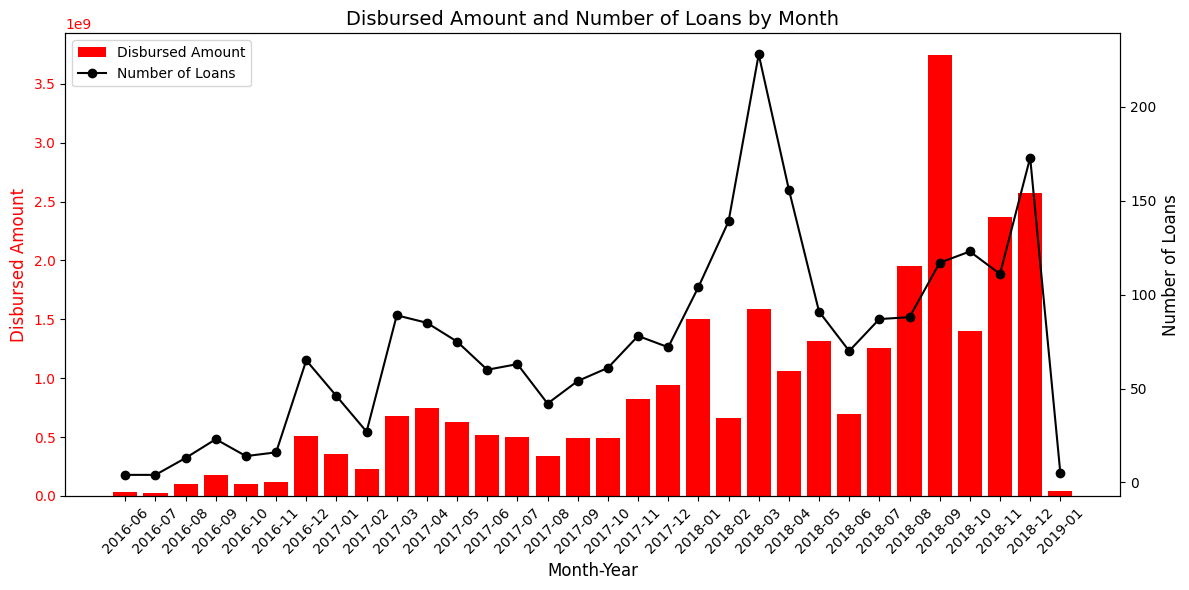

In [730]:
import matplotlib.pyplot as plt
import seaborn as sns

df['month_year'] = df['from_date'].dt.to_period('M')

# Gom nhóm dữ liệu theo tháng
df_monthly = df.groupby('month_year').agg({
    'disbursed_amount': 'sum',  # Tổng số tiền giải ngân theo tháng
    'loan_id': 'count'          # Số lượng khoản vay theo tháng
}).reset_index()

# Chuyển đổi cột 'month_year' về dạng chuỗi để dễ hiển thị trên biểu đồ
df_monthly['month_year'] = df_monthly['month_year'].astype(str)

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(12, 6))

# Biểu đồ cột cho số tiền giải ngân (màu đỏ)
bar_color = 'red'
ax1.bar(df_monthly['month_year'], df_monthly['disbursed_amount'], color=bar_color, label='Disbursed Amount')
ax1.set_xlabel('Month-Year', fontsize=12, color='black')
ax1.set_ylabel('Disbursed Amount', fontsize=12, color=bar_color)
ax1.tick_params(axis='y', labelcolor=bar_color)
ax1.tick_params(axis='x', rotation=45)

# Trục y phụ cho số lượng khoản vay
ax2 = ax1.twinx()
line_color = 'black'
ax2.plot(df_monthly['month_year'], df_monthly['loan_id'], color=line_color, marker='o', linestyle='-', label='Number of Loans')
ax2.set_ylabel('Number of Loans', fontsize=12, color=line_color)
ax2.tick_params(axis='y', labelcolor=line_color)

# Đặt nền trắng
fig.patch.set_facecolor('white')
ax1.set_facecolor('white')
ax2.set_facecolor('white')

# Tiêu đề biểu đồ
plt.title('Disbursed Amount and Number of Loans by Month', fontsize=14, color='black')

# Hiển thị legend kết hợp cho cả hai trục
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()

Số lượng khoản vay ở các tháng đầu năm khá cao, tuy nhiên thì lượng tiền được giải ngân thường tập trung vào các tháng cuối năm vì phỏng đoán ngân hàng đang thực hiện giải ngân mạnh vào cuối kì của năm cho các mục tiêu tài chính. Ở các tháng đầu năm thì thường có nhiều dịp lễ tết nên việc sắm sửa các khoản nhỏ cũng được nâng cao, diều này cũng thể hiện 1 phần ở các tháng cuối năm (Phỏng đoán)

Đi sâu hơn thì tìm hiểu đến tính chất của các khoản vay này (theo mục khoản vay, tình trạng và số tiền còn lại)

In [731]:
# Gom nhóm số lượng khoản vay theo tháng và loại hình thanh toán lãi suất
df_grouped = df.groupby(['month_year', 'interest_payment_type'])['loan_id'].count().unstack(fill_value=0)

# Chuyển đổi index thành chuỗi để dễ hiển thị
df_grouped.index = df_grouped.index.astype(str)

# Chuyển đổi dữ liệu sang dạng phần trăm (%) theo từng tháng
df_percentage = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

# Làm tròn giá trị đến 2 chữ số thập phân
df_percentage = df_percentage.round(2)
df_percentage


interest_payment_type,Dư nợ giảm dần cố định ngày đóng lãi,Dư nợ giảm dần theo chu kỳ,Lãi ngày,Tất toán cuối kỳ
month_year,,,,
2016-06,0.00,0.00,100.00,0.00
2016-07,0.00,0.00,100.00,0.00
2016-08,0.00,0.00,100.00,0.00
2016-09,0.00,0.00,100.00,0.00
2016-10,0.00,0.00,100.00,0.00
2016-11,0.00,0.00,100.00,0.00
2016-12,0.00,0.00,100.00,0.00
2017-01,0.00,0.00,100.00,0.00
2017-02,0.00,0.00,100.00,0.00


Có thể thấy rõ ràng là khoản vay lãi theo ngày được phát sinh vào hầu hết các tháng trong năm (hầu hết dành cho những khoản vay ngắn hạn, và chu kì trả nhanh), khoản vay cuối năm phù hợp với các khoản vay dài hạn thường có xu hướng phát sinh nhiều khoản vay dạng này hơn (Thường cho việc đầu tư và xu hướng mua tài sản cố định lâu dài)
Ngoài ra, các ngân hàng thường đưa ra ưu đãi vay dài hạn vào cuối năm để thu hút khách hàng, thúc đẩy nhu cầu vay vốn.

In [732]:
df_grouped = df.groupby(['month_year', 'credit_product_name'])['loan_id'].count().reset_index()
df_grouped['percentage'] = df_grouped.groupby('month_year')['loan_id'].transform(lambda x: x / x.sum() * 100)
df_grouped['percentage'] = df_grouped['percentage'].round(2)
df_pivot = df_grouped.pivot(index='credit_product_name', columns='month_year', values='percentage')
df_pivot.replace(np.nan, "0")


month_year,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,...,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01
credit_product_name,,,,,,,,,,,,,,,,,,,,,
Cầm Sim Số Đẹp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1.71,0,0.9,0,0
Cầm cố xe máy,0,0,0,0,0,0,0,8.7,22.22,29.21,...,12.18,20.88,18.57,19.54,30.68,38.46,36.59,43.24,32.95,80.0
Cầm cố xe máy KCC,0,0,0,0,0,0,0,0,0,0,...,9.62,5.49,5.71,13.79,13.64,13.68,9.76,0.9,5.2,0
Cầm cố Điện thoại,100.0,100.0,100.0,100.0,100.0,100.0,100.0,91.3,77.78,70.79,...,23.08,50.55,47.14,51.72,38.64,32.48,43.9,44.14,56.07,20.0
Cầm cố Điện thoại HK,0,0,0,0,0,0,0,0,0,0,...,11.54,18.68,27.14,9.2,10.23,10.26,7.32,9.01,0,0
Cầm ô tô,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.58,0
Vay theo sim,0,0,0,0,0,0,0,0,0,0,...,42.31,0,0,0,0,0,0,0,0,0
Vay trực tuyến qua Sim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.89,0
Ô tô ngân hàng,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2.3,0,0.85,0.81,0,0,0


In [733]:
df_grouped = df.groupby(['month_year', 'credit_product_name'])['loan_id'].count().unstack(fill_value=0)

# Chuyển đổi index thành chuỗi để dễ hiển thị
df_grouped.index = df_grouped.index.astype(str)

# Chuyển đổi dữ liệu sang dạng phần trăm (%) theo từng tháng
df_percentage = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

# Làm tròn giá trị đến 2 chữ số thập phân
df_percentage = df_percentage.round(2)
df_percentage

credit_product_name,Cầm Sim Số Đẹp,Cầm cố xe máy,Cầm cố xe máy KCC,Cầm cố Điện thoại,Cầm cố Điện thoại HK,Cầm ô tô,Vay theo sim,Vay trực tuyến qua Sim,Ô tô ngân hàng,Đăng ký xe ô tô
month_year,,,,,,,,,,
2016-06,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00
2016-07,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00
2016-08,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00
2016-09,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00
2016-10,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00
2016-11,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00
2016-12,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00
2017-01,0.00,8.70,0.00,91.30,0.00,0.00,0.00,0.00,0.00,0.00
2017-02,0.00,22.22,0.00,77.78,0.00,0.00,0.00,0.00,0.00,0.00


từ mục này có thể nhận thấy 2 khoản vay chủ yếu của khách hàng là "Cầm cố Điện thoại" và "Cầm cố xe máy" . Rõ hơn ở năm 2018 là số lượng khoản vay ngắn hạn "Vay theo sim", "cầm cố điện thoai" có mức giải ngân thấp tập trung nhiều ở các tháng như 2 3 4 trong khi các khoản vay lớn hơn như cầm cố xe máy, đăng ký xe ô tô lại có sự tập trung và dịch chuyển đến gần các tháng cuối năm. 

Bên cạnh đó thì có thể thấy khách hàng đang dần chuyển sang sử dụng nhiều các sản phẩm khác nhau

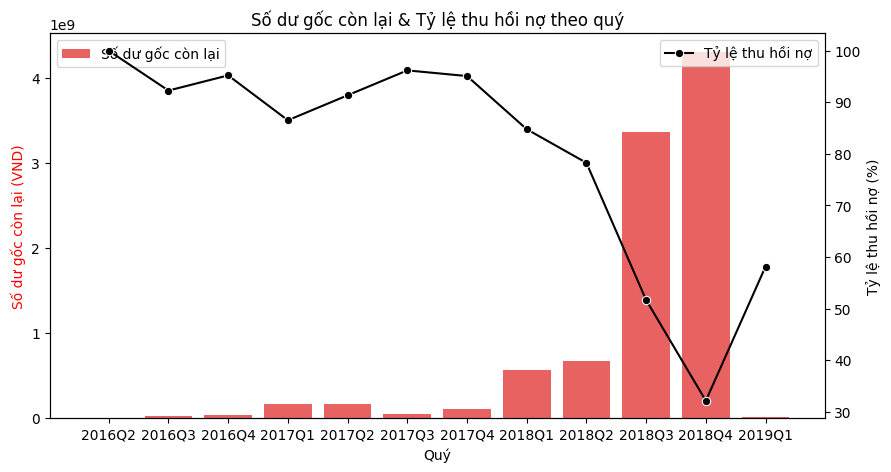

In [734]:
df['remaining_principal'] = df.apply(lambda row: 0 if row['status'] in ["Kết thúc", "Đang vay xong"] else row['remaining_principal'], axis=1)
df['quarter'] = df['from_date'].dt.to_period('Q')
# Tính tổng số dư gốc còn lại và số tiền giải ngân theo quý
df_grouped = df.groupby('quarter').agg({
    'disbursed_amount': 'sum',
    'remaining_principal': 'sum'
}).reset_index()
# Tính tỷ lệ thu hồi nợ
df_grouped['recovery_rate'] = ((df_grouped['disbursed_amount'] - df_grouped['remaining_principal']) / df_grouped['disbursed_amount']) * 100

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(10, 5))
sns.barplot(x=df_grouped['quarter'].astype(str), y=df_grouped['remaining_principal'], color='red', alpha=0.7, ax=ax1, label='Số dư gốc còn lại')
ax2 = ax1.twinx()
sns.lineplot(x=df_grouped['quarter'].astype(str), y=df_grouped['recovery_rate'], color='black', marker='o', ax=ax2, label='Tỷ lệ thu hồi nợ')
ax1.set_xlabel("Quý")
ax1.set_ylabel("Số dư gốc còn lại (VND)", color='red')
ax2.set_ylabel("Tỷ lệ thu hồi nợ (%)", color='black')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title("Số dư gốc còn lại & Tỷ lệ thu hồi nợ theo quý")
plt.show()


Biểu đồ sau có thể theo dõi số lượng dư nợ còn lại và tỷ lệ thu hồi khoản vay, nếu tỷ lệ thu hồi nợ thấp trong khi số lượng dư nợ quá cao thì có thể phải theo dõi hơn. (Ngoài ra, sâu hơn thì phải theo dõi tỷ lệ nợ xấu)

In [735]:
df["status"] == ""

0       False
1       False
2       False
3       False
4       False
        ...  
2378    False
2379    False
2380    False
2381    False
2382    False
Name: status, Length: 2383, dtype: bool

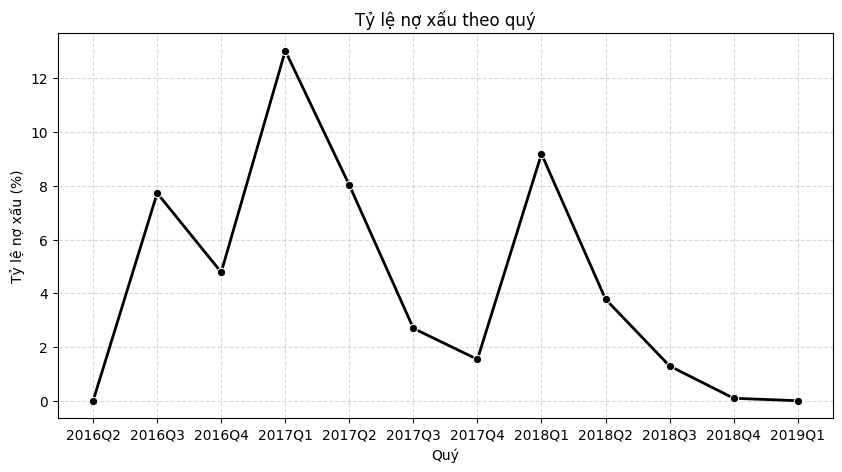

In [736]:
df_grouped = df.groupby('quarter')['disbursed_amount'].sum().reset_index()

# Tổng dư nợ của khoản vay có status = "Nợ xấu" theo quý
bad_debt = df[df['status'] == 'Nợ Xấu'].groupby('quarter')['remaining_principal'].sum().reset_index()
bad_debt.rename(columns={'remaining_principal': 'bad_debt_amount'}, inplace=True)

# Gộp dữ liệu vào bảng tổng hợp
df_grouped = df_grouped.merge(bad_debt, on='quarter', how='left').fillna(0)

# Tính tỷ lệ nợ xấu
df_grouped['bad_debt_ratio'] = (df_grouped['bad_debt_amount'] / df_grouped['disbursed_amount']) * 100

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_grouped['quarter'].astype(str), y=df_grouped['bad_debt_ratio'], color='black', marker='o', linewidth=2)

# Thiết lập tiêu đề và nhãn
plt.xlabel("Quý")
plt.ylabel("Tỷ lệ nợ xấu (%)")
plt.title("Tỷ lệ nợ xấu theo quý")
plt.grid(True, linestyle='--', alpha=0.5)

# Hiển thị biểu đồ
plt.show()

## Các yếu tố ảnh hưởng đến nợ xấu

In [737]:
df[df["status"] == "Nợ Xấu"]

,index,application_date,credit_score_v2,customer_phone_number,from_date,id,loan_id,initial_loan_amount,disbursed_amount,remaining_principal,...,credit_product_name,interest_payment_type,longest_overdue_days,check_time,number_of_loans,has_bad_debt,has_late_payment,JobName,month_year,quarter
18,20,2016-08-16,581,969037483,2016-08-16,326,24230,5000000,5000000,3720000,...,Cầm cố Điện thoại,Lãi ngày,12,2019-03-17 13:03:51,0,0,0,NaN,2016-08,2016Q3
24,30,2016-08-29,553,968439069,2016-08-29,549,26575,10000000,10000000,10000000,...,Cầm cố Điện thoại,Lãi ngày,7,2019-03-17 14:22:29,1,0,1,NaN,2016-08,2016Q3
29,37,2016-09-10,576,965624150,2016-09-10,700,29194,5000000,5000000,5000000,...,Cầm cố Điện thoại,Lãi ngày,39,2019-03-17 08:38:20,0,0,0,NaN,2016-09,2016Q3
33,1666,2018-02-28,673,368616446,2018-02-28,193458,50818,3000000,3000000,3000000,...,Vay theo sim,Lãi ngày,6,2019-03-17 11:16:28,-1,1,0,NaN,2018-02,2018Q1
37,42,2016-09-07,629,372148599,2016-09-07,820,28209,5000000,5000000,5000000,...,Cầm cố Điện thoại,Lãi ngày,38,2019-03-17 11:10:03,0,0,0,NaN,2016-09,2016Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,2449,2018-07-29,416,343115431,2018-07-29,242221,53317,10000000,10000000,8000000,...,Cầm cố Điện thoại,Lãi ngày,30,"Mar 27, 2019 3:44:12 PM",-1,0,0,NaN,2018-07,2018Q3
1974,2531,2018-10-03,644,976881010,2018-10-03,267951,54369,10000000,6000000,3000000,...,Cầm cố Điện thoại,Tất toán cuối kỳ,1,2019-03-17 10:32:00,1,0,1,NaN,2018-10,2018Q4
1982,2543,2018-09-01,550,333192936,2018-09-01,258700,53866,10000000,6000000,5286158,...,Cầm cố Điện thoại,Dư nợ giảm dần cố định ngày đóng lãi,27,2019-03-17 10:03:41,-1,0,0,NaN,2018-09,2018Q3
2027,2625,2018-09-24,548,968138139,2018-09-24,267028,54204,10000000,6000000,6000000,...,Cầm cố Điện thoại,Tất toán cuối kỳ,-1,2019-03-17 09:53:52,0,0,0,NaN,2018-09,2018Q3


Tỷ lệ nợ xấu của ngân hàng cũng đang ở mức khá cao, tuy là có sự kiểm soát đáng kể theo từng năm nhưng nhìn chung vẫn đang ở mức khá cao, cụ thể là vào Quý 1 và Quý 2 thời điểm có nhiều khoản vay ngắn hạn, giá trị thấp nên cần phải kiểm soát chặt chẽ hơn. Đồng thời tôi cũng muốn đi sâu vào phân tích nhóm khách hàng này xem có điều gì khác biệt so với nhóm khách hàng còn lại.

In [738]:
# Tạo 2 danh mục để so sánh
loan_status_debt = df[['status', "job_title", "salary", "credit_score_v2", "longest_overdue_days", "has_late_payment", "has_bad_debt"]]
loan_status_debt["loan_status_group"] = loan_status_debt["status"].apply(lambda x: "Nợ Xấu" if x == "Nợ Xấu" else "Khác")

loan_status_debt

/var/folders/2q/4qh18k_s3d538sldrmw97vj00000gn/T/ipykernel_12746/3158784506.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_status_debt["loan_status_group"] = loan_status_debt["status"].apply(lambda x: "Nợ Xấu" if x == "Nợ Xấu" else "Khác")


,status,job_title,salary,credit_score_v2,longest_overdue_days,has_late_payment,has_bad_debt,loan_status_group
0,Đang vay xong,unknown,25000000.0,403,4,0,0,Khác
1,Kết thúc,unknown,7700000.0,403,147,0,0,Khác
2,Kết thúc,Nhân viên văn phòng,25000000.0,531,3,0,0,Khác
3,Kết thúc,Nhân viên văn phòng,0.0,588,16,0,0,Khác
4,Kết thúc,unknown,12000000.0,675,8,0,0,Khác
...,...,...,...,...,...,...,...,...
2378,Đang Vay,unknown,7500000.0,577,0,0,0,Khác
2379,Kết thúc,unknown,0.0,638,2,0,0,Khác
2380,Kết thúc,Tự doanh & Kinh doanh,8000000.0,605,0,0,0,Khác
2381,Kết thúc,Tự doanh & Kinh doanh,12000000.0,597,0,0,0,Khác


Trước mắt là các yếu tố liên quan đến công việc, nghề nghiệp và các yếu tố nhân khẩu học khác.

/var/folders/2q/4qh18k_s3d538sldrmw97vj00000gn/T/ipykernel_12746/676484348.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=loan_status_debt_filtered["loan_status_group"], x=loan_status_debt_filtered["salary"], palette={"Nợ Xấu": "red", "Khác": "blue"})


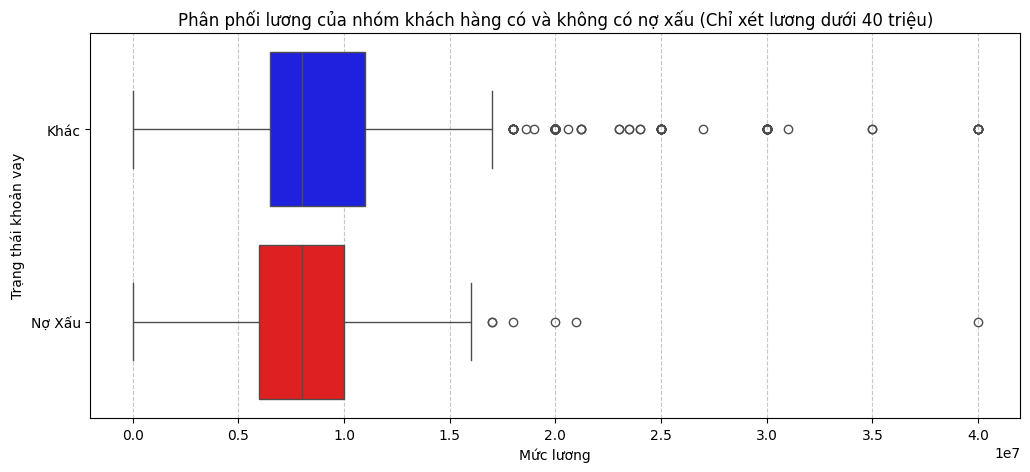

In [739]:
loan_status_debt_filtered = loan_status_debt[loan_status_debt["salary"] <= 40000000]

# Vẽ boxplot
plt.figure(figsize=(12, 5))
sns.boxplot(y=loan_status_debt_filtered["loan_status_group"], x=loan_status_debt_filtered["salary"], palette={"Nợ Xấu": "red", "Khác": "blue"})
plt.title("Phân phối lương của nhóm khách hàng có và không có nợ xấu (Chỉ xét lương dưới 40 triệu)")
plt.xlabel("Mức lương")
plt.ylabel("Trạng thái khoản vay")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

Mức lương chỉ chênh lệch nhau 1 chút, chưa thể hiện rõ được đặc điểm của nhóm nợ xấu, không quá khác biệt so với các nhóm khác (Đặc điểm có thể nằm ở các nhóm ngành nghề) (Thông tin này cũng có thể là người vay tự khai nên chưa xác định được đúng)

In [740]:
job_bad_debt = df.groupby(["job_title", "status"]).size().unstack(fill_value=0)
job_bad_debt["Tỷ lệ nợ xấu (%)"] = (job_bad_debt.get("Nợ Xấu", 0) / job_bad_debt.sum(axis=1)) * 100
job_bad_debt_sorted = job_bad_debt.sort_values("Tỷ lệ nợ xấu (%)", ascending=False)
job_bad_debt_sorted

status,Kết thúc,Nợ Xấu,Đang Vay,Đang vay xong,Tỷ lệ nợ xấu (%)
job_title,,,,,
"Nhà nước, Công an, Quân đội",66,9,15,0,10.000000
Nhân viên văn phòng,805,115,268,0,9.680135
unknown,309,41,98,1,9.131403
Tự doanh & Kinh doanh,259,34,93,0,8.808290
Lao động phổ thông & Dịch vụ,101,7,64,0,4.069767
Giáo dục & Đào tạo,16,0,17,0,0.000000
"Kỹ thuật, Công nghệ, Xây dựng",12,0,11,0,0.000000
Lao động không ổn định / Sinh viên,4,0,1,0,0.000000
Marketing & Bảo hiểm,2,0,8,0,0.000000


Có thể thấy chiếm cao nhất là nhóm ngành "Nhà nước, Công an, Quân đội" tuy nhiên số lượng khoản vay lại ở mức thấp nên có phần chưa đại điện được 
Thay vào đó thì các nhóm ngành "Nhân viên văn phòng", "Tự doanh & Kinh doanh" ở mức khá cao, và đặc biệt là việc chưa xác định được nghề nghiệp cụ thể của người đi vay cũng là một yếu tố dẫn đến điều này với việc "unknown" ỏ mức 9.13%

Việc xác định được các đặc điểm về tính chất nghề nghiệp của người đi vay cũng bao gồm việc phân tích về nơi làm việc, xác định doanh nghiệp của người vay tuy nhiên thì trong phân tich trên lại không có đủ yếu tố và các thông tin ngoại cảnh để xác đinh điều đó nên tôi sẽ chuyển hướng qua phân tích tiếp về lịch sử tính dụng

In [741]:
late_payment_analysis = loan_status_debt.groupby("has_late_payment")["status"].value_counts(normalize=True).unstack() * 100
late_payment_analysis

status,Kết thúc,Nợ Xấu,Đang Vay,Đang vay xong
has_late_payment,,,,
0,66.829507,9.135320,23.986321,0.048852
1,64.880952,5.654762,29.464286,NaN


Tỷ lệ nợ xấu dựa trên trường hợp trả chậm chưa thực sự rõ ràng,

In [742]:
Bad_payment_analysis = loan_status_debt.groupby("has_bad_debt")["status"].value_counts(normalize=True).unstack() * 100
Bad_payment_analysis


status,Kết thúc,Nợ Xấu,Đang Vay,Đang vay xong
has_bad_debt,,,,
0,66.478076,7.449316,26.025460,0.047148
1,67.175573,18.320611,14.503817,NaN


Tuy nhiên ngược lại ở mục trả chậm thì ở lịch sử tín dụng có nợ xấu cho thấy rằng người vay tiền có lịch sử nợ xấu sẽ có khi hướng "tái phạm" trong lần vay tiếp theo. Đay cũng là một yếu tố cần để ý trong quá trình phê duyệt khoản vay và lượng tiền giải ngân

Hơn nữa tôi cũng muốn điều tra thêm về điểm tín dụng 

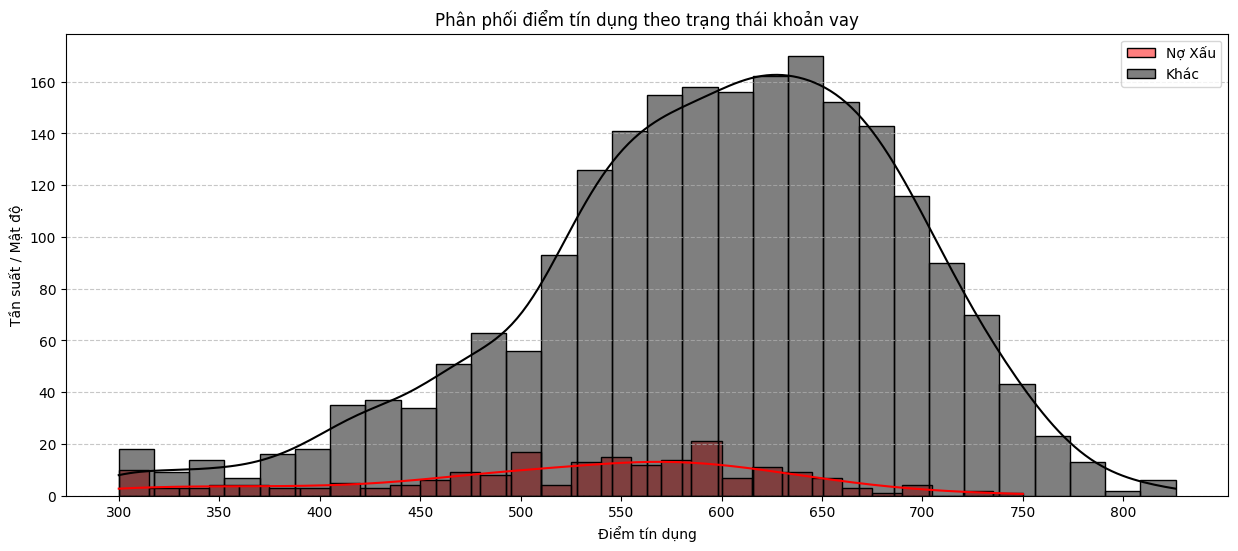

In [743]:
plt.figure(figsize=(15, 6))
sns.histplot(df[df["status"] == "Nợ Xấu"]["credit_score_v2"], 
             color="red", bins=30, kde=True, label="Nợ Xấu", alpha=0.5)

# Vẽ biểu đồ histogram + KDE cho nhóm Không Nợ Xấu
sns.histplot(df[df["status"] != "Nợ Xấu"]["credit_score_v2"], 
             color="black", bins=30, kde=True, label="Khác", alpha=0.5)

# Chỉnh khoảng hiển thị trên trục x
plt.xticks(np.arange(df["credit_score_v2"].min(), df["credit_score_v2"].max(), step=50))

# Tiêu đề và nhãn
plt.title("Phân phối điểm tín dụng theo trạng thái khoản vay")
plt.xlabel("Điểm tín dụng")
plt.ylabel("Tần suất / Mật độ")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

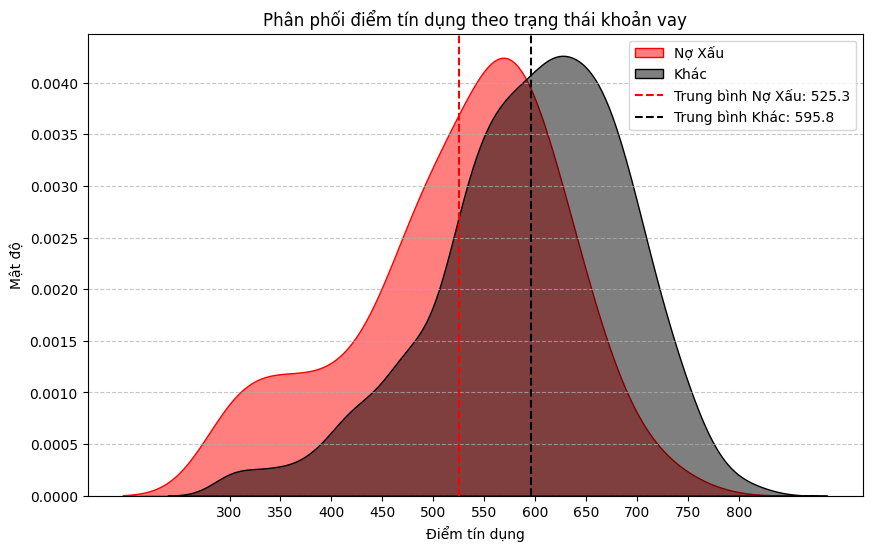

In [744]:
plt.figure(figsize=(10, 6))

# KDE Plot cho nhóm Nợ Xấu
sns.kdeplot(df[df["status"] == "Nợ Xấu"]["credit_score_v2"], 
            color="red", fill=True, label="Nợ Xấu", alpha=0.5)

# KDE Plot cho nhóm Khác
sns.kdeplot(df[df["status"] != "Nợ Xấu"]["credit_score_v2"], 
            color="black", fill=True, label="Khác", alpha=0.5)

# Tính trung bình điểm tín dụng của từng nhóm
mean_bad_debt = df[df["status"] == "Nợ Xấu"]["credit_score_v2"].mean()
mean_other = df[df["status"] != "Nợ Xấu"]["credit_score_v2"].mean()

# Vẽ đường trung bình
plt.axvline(mean_bad_debt, color="red", linestyle="--", label=f"Trung bình Nợ Xấu: {mean_bad_debt:.1f}")
plt.axvline(mean_other, color="black", linestyle="--", label=f"Trung bình Khác: {mean_other:.1f}")

# Chỉnh khoảng hiển thị trên trục x
plt.xticks(np.arange(df["credit_score_v2"].min(), df["credit_score_v2"].max(), step=50))

# Tiêu đề và nhãn
plt.title("Phân phối điểm tín dụng theo trạng thái khoản vay")
plt.xlabel("Điểm tín dụng")
plt.ylabel("Mật độ")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

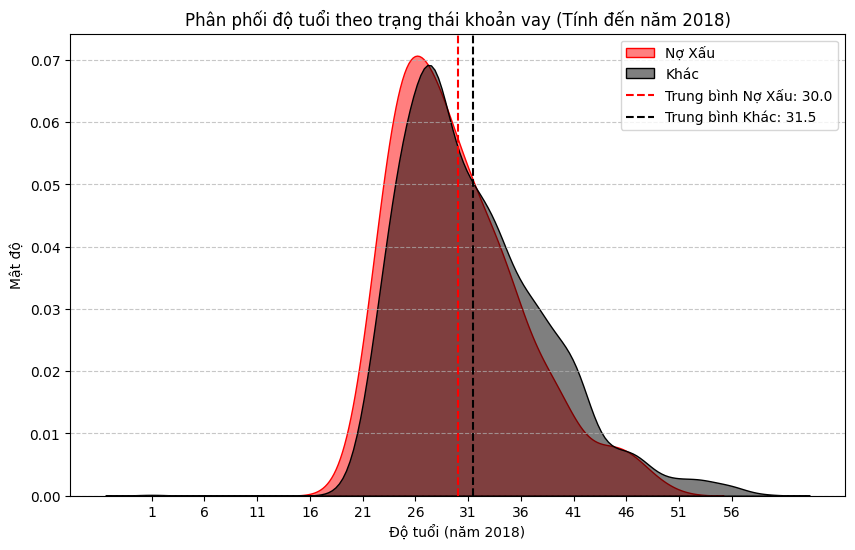

In [745]:
df["birthday"] = pd.to_datetime(df["birthday"], errors="coerce")

# Tính độ tuổi tính đến năm 2018
df["age"] = 2018 - df["birthday"].dt.year

plt.figure(figsize=(10, 6))

# KDE Plot cho nhóm Nợ Xấu
sns.kdeplot(df[df["status"] == "Nợ Xấu"]["age"], 
            color="red", fill=True, label="Nợ Xấu", alpha=0.5)

# KDE Plot cho nhóm Khác
sns.kdeplot(df[df["status"] != "Nợ Xấu"]["age"], 
            color="black", fill=True, label="Khác", alpha=0.5)

# Tính trung bình độ tuổi của từng nhóm
mean_bad_debt = df[df["status"] == "Nợ Xấu"]["age"].mean()
mean_other = df[df["status"] != "Nợ Xấu"]["age"].mean()

# Vẽ đường trung bình
plt.axvline(mean_bad_debt, color="red", linestyle="--", label=f"Trung bình Nợ Xấu: {mean_bad_debt:.1f}")
plt.axvline(mean_other, color="black", linestyle="--", label=f"Trung bình Khác: {mean_other:.1f}")

# Chỉnh khoảng hiển thị trên trục x
plt.xticks(np.arange(df["age"].min(), df["age"].max(), step=5))

# Tiêu đề và nhãn
plt.title("Phân phối độ tuổi theo trạng thái khoản vay (Tính đến năm 2018)")
plt.xlabel("Độ tuổi (năm 2018)")
plt.ylabel("Mật độ")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

# Model

In [746]:
pip install imbalanced-learn



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/var/folders/2q/4qh18k_s3d538sldrmw97vj00000gn/T/ipykernel_12746/2497693663.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette=["red", "black"])


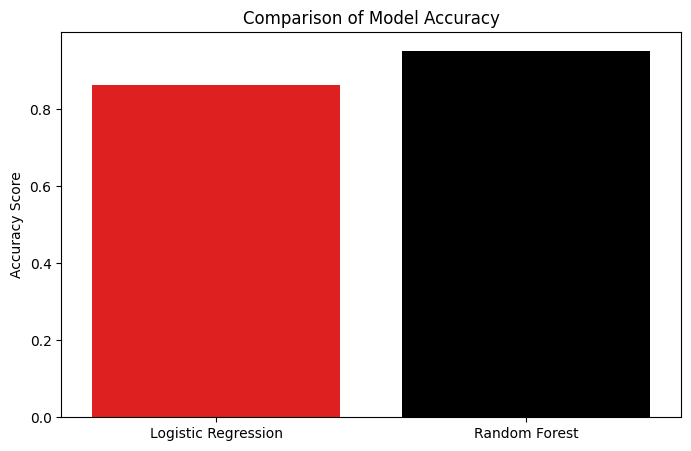

Best performing model: Random Forest with accuracy 0.95


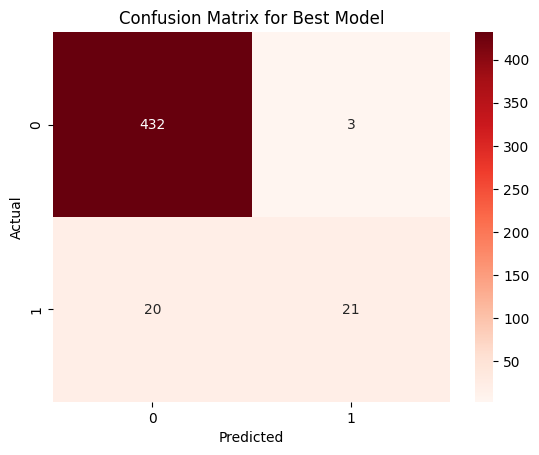

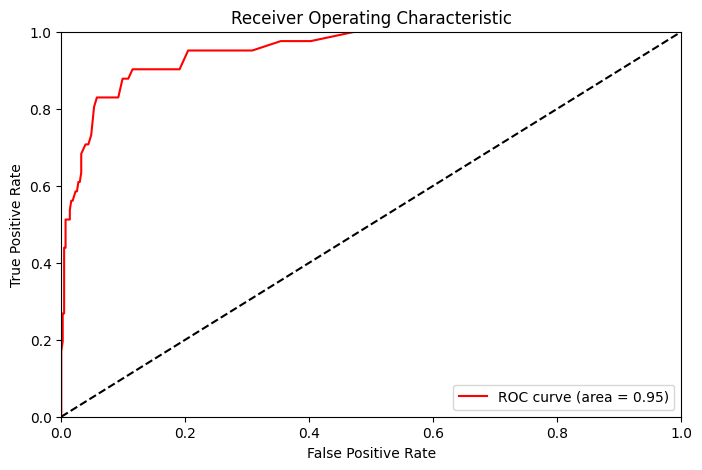

In [747]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

# Feature Engineering
# Feature Engineering
df["age"] = 2018 - pd.to_datetime(df["birthday"]).dt.year
df["status_grouped"] = df["status"].apply(lambda x: 1 if x == "Nợ Xấu" else 0)

features = ["age", "salary", "disbursed_amount", "remaining_principal", "number_of_loans", "longest_overdue_days", "initial_loan_amount",
            "job_title", "credit_product_name", "interest_payment_type", "has_bad_debt", 'city_name', 'ward_name', "residence_type", "residence_duration", 'has_late_payment']
target = "status_grouped"
df = df[features + [target]].dropna()

X = df[features]
y = df[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing
numeric_features = ["age", "salary", "disbursed_amount", "remaining_principal", "number_of_loans", "longest_overdue_days", "initial_loan_amount"]
categorical_features = ["job_title", "credit_product_name", "interest_payment_type", 'city_name', 'ward_name', "residence_type"]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Handling Imbalanced Data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Model Training & Evaluation
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

results = {}
all_predictions = {}
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)
    all_predictions[name] = (model, y_pred)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette=["red", "black"])
plt.title("Comparison of Model Accuracy")
plt.ylabel("Accuracy Score")
plt.show()

# Best Model Selection
best_model_name = max(results, key=results.get)
best_model, best_model_pred = all_predictions[best_model_name]
print(f"Best performing model: {best_model_name} with accuracy {results[best_model_name]:.2f}")

# Confusion Matrix for the best model
conf_matrix = confusion_matrix(y_test, best_model_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix for Best Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve for the best model
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='red', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



